In [3]:
# Shared helper functions for timing, memory, and test data generation

import time, random
from typing import List, Callable
import matplotlib.pyplot as plt
from memory_profiler import memory_usage  # install: pip install memory-profiler

# Measure execution time (average over repeats)
def time_function(fn: Callable, *args, repeats: int = 3, **kwargs) -> float:
    durations = []
    for _ in range(repeats):
        t0 = time.perf_counter()
        fn(*args, **kwargs)
        t1 = time.perf_counter()
        durations.append(t1 - t0)
    return sum(durations) / len(durations)

# Measure peak memory during function execution
def peak_memory_used(fn: Callable, *args, **kwargs) -> float:
    mem = memory_usage((fn, args, kwargs), interval=0.05, max_iterations=1)
    return max(mem) - mem[0]

# Generate a random integer list
def generate_random_array(n: int, seed: int = 42, low: int = -10000, high: int = 10000) -> List[int]:
    random.seed(seed)
    return [random.randint(low, high) for _ in range(n)]

# Check if a list is sorted
def is_sorted(arr: List[int]) -> bool:
    return all(arr[i] <= arr[i+1] for i in range(len(arr)-1))


In [4]:
def fibonacci_recursive(n: int) -> int:
    """
    Naïve recursive Fibonacci
    Input: n (non-negative integer)
    Output: nth Fibonacci number
    Time Complexity: O(2^n) (Exponential)
    Space Complexity: O(n) (recursion stack)
    Use Case: Educational; DO NOT use for large n
    """
    if n <= 1:
        return n
    return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)


In [6]:
print(fibonacci_recursive(0))   
print(fibonacci_recursive(1))   
print(fibonacci_recursive(10))  


0
1
55


n=10 -> time=0.0000s, peak memory=0.0156 MiB
n=20 -> time=0.0008s, peak memory=0.0000 MiB
n=25 -> time=0.0082s, peak memory=0.0000 MiB
n=30 -> time=0.0899s, peak memory=0.0000 MiB


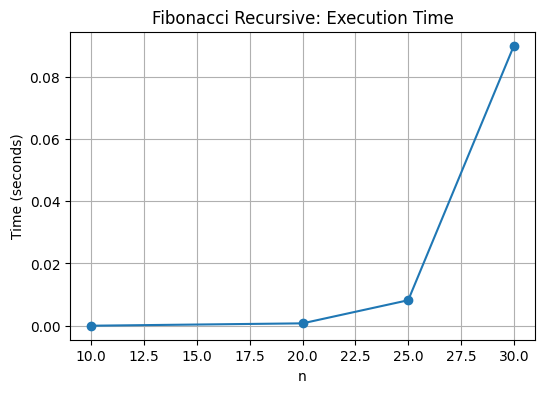

In [7]:
# Profiling naive Fibonacci for different n values
sizes = [10, 20, 25, 30]  # keep small to avoid huge delays

times = []
memories = []

for n in sizes:
    t = time_function(fibonacci_recursive, n, repeats=1)  # repeat=1 because it's slow
    m = peak_memory_used(fibonacci_recursive, n)
    times.append(t)
    memories.append(m)
    print(f"n={n} -> time={t:.4f}s, peak memory={m:.4f} MiB")

# Plot execution time
plt.figure(figsize=(6,4))
plt.plot(sizes, times, marker='o')
plt.title("Fibonacci Recursive: Execution Time")
plt.xlabel("n")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.show()


### Analysis: Fibonacci (Naive Recursive)
- **Observed time:** Grows extremely fast as n increases (exponential growth).
- **Observed memory:** Increases slightly with n due to recursion stack.
- **Expected vs Observed:** Matches theoretical O(2^n) time and O(n) space.
- **Recursion depth risk:** For large n (>1000), risk of hitting Python recursion limit.
- **Suitability:** Educational; impractical for large n.


In [9]:
def fibonacci_dp(n: int) -> int:
    """
    Fibonacci using Dynamic Programming (iterative)
    Input: n (non-negative integer)
    Output: nth Fibonacci number
    Time Complexity: O(n)
    Space Complexity: O(1)
    Use Case: Efficient for large n
    """
    if n <= 1:
        return n
    a, b = 0, 1
    for _ in range(2, n+1):
        a, b = b, a + b
    return b


In [11]:
print(fibonacci_dp(10))   
print(fibonacci_dp(100)) 

55
354224848179261915075


n=1000 -> time=0.000038s, peak memory=0.0000 MiB
n=10000 -> time=0.001854s, peak memory=0.0078 MiB
n=50000 -> time=0.023560s, peak memory=0.0000 MiB
n=100000 -> time=0.075927s, peak memory=0.0000 MiB


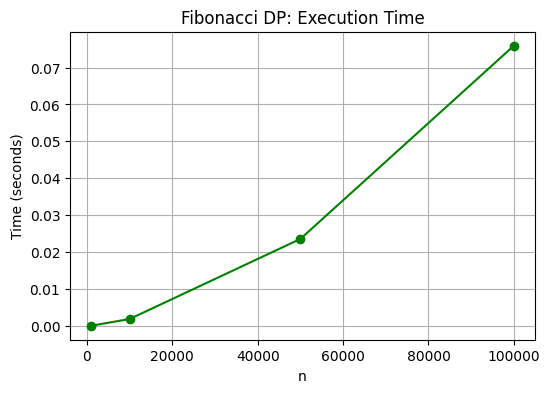

In [12]:
sizes = [1000, 10000, 50000, 100000]  # large sizes possible

times = []
memories = []

for n in sizes:
    t = time_function(fibonacci_dp, n)
    m = peak_memory_used(fibonacci_dp, n)
    times.append(t)
    memories.append(m)
    print(f"n={n} -> time={t:.6f}s, peak memory={m:.4f} MiB")

# Plot execution time
plt.figure(figsize=(6,4))
plt.plot(sizes, times, marker='o', color='green')
plt.title("Fibonacci DP: Execution Time")
plt.xlabel("n")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.show()


### Analysis: Fibonacci (Dynamic Programming)
- **Observed time:** Grows linearly with n, but remains very fast even for n = 100,000.
- **Observed memory:** Almost constant; only a few variables stored.
- **Expected vs Observed:** Matches theoretical O(n) time and O(1) space.
- **No recursion issues:** This method avoids stack overflow.
- **Suitability:** Ideal for large n when exact value is needed.


In [13]:
def merge(left, right):
    i = j = 0
    result = []
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

In [14]:
def merge_sort(arr: List[int]) -> List[int]:
    """
    Merge Sort
    Input: list of numbers
    Output: sorted list
    Time: O(n log n) for all cases
    Space: O(n)
    Stable: Yes
    """
    if len(arr) <= 1:
        return arr[:]
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)


In [15]:
print(merge_sort([5, 3, 8, 1, 2]))


[1, 2, 3, 5, 8]


In [16]:
import random
def quick_sort(arr: List[int]) -> List[int]:
    """
    Quick Sort
    Input: list of numbers
    Output: sorted list
    Time: Avg O(n log n), Worst O(n^2)
    Space: O(log n)
    Stable: No
    """
    if len(arr) <= 1:
        return arr
    pivot = random.choice(arr)
    left = [x for x in arr if x < pivot]
    mid = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + mid + quick_sort(right)

# Test
print(quick_sort([3, 6, 2, 8, 5]))


[2, 3, 5, 6, 8]


In [17]:
def insertion_sort(arr: List[int]) -> List[int]:
    """
    Insertion Sort
    Time: Best O(n), Worst O(n^2)
    Space: O(1)
    Stable: Yes
    """
    a = arr[:]
    for i in range(1, len(a)):
        key = a[i]
        j = i - 1
        while j >= 0 and a[j] > key:
            a[j+1] = a[j]
            j -= 1
        a[j+1] = key
    return a

# Test
print(insertion_sort([4, 2, 5, 1, 3]))


[1, 2, 3, 4, 5]


In [18]:
def bubble_sort(arr: List[int]) -> List[int]:
    """
    Bubble Sort
    Time: Best O(n), Worst O(n^2)
    Space: O(1)
    Stable: Yes
    """
    a = arr[:]
    n = len(a)
    for i in range(n):
        swapped = False
        for j in range(0, n-i-1):
            if a[j] > a[j+1]:
                a[j], a[j+1] = a[j+1], a[j]
                swapped = True
        if not swapped:
            break
    return a

# Test
print(bubble_sort([3, 1, 4, 2]))


[1, 2, 3, 4]


In [19]:
def selection_sort(arr: List[int]) -> List[int]:
    """
    Selection Sort
    Time: O(n^2)
    Space: O(1)
    Stable: No
    """
    a = arr[:]
    n = len(a)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if a[j] < a[min_idx]:
                min_idx = j
        a[i], a[min_idx] = a[min_idx], a[i]
    return a

# Test
print(selection_sort([64, 25, 12, 22, 11]))


[11, 12, 22, 25, 64]


In [21]:
def binary_search(arr: List[int], target: int) -> int:
    """
    Binary Search
    Input: sorted list, target
    Output: index or -1
    Time: O(log n)
    Space: O(1)
    """
    low, high = 0, len(arr)-1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1
    return -1

# Test
arr = [0, 5, 10, 15, 20]
print(binary_search(arr, 10)) 
print(binary_search(arr, 7))   


2
-1


Merge Sort: [0.00010073340187470119, 0.0005601333299030861, 0.0012304333504289389, 0.0026573333889245987]
Quick Sort: [0.0001346999779343605, 0.0007303999736905098, 0.0013005000073462725, 0.00472973333671689]
Insertion Sort: [0.000175166642293334, 0.0035726333347459636, 0.014691666699945927, 0.058076733335231744]
Bubble Sort: [0.00021186665010948977, 0.006895866710692644, 0.02961453329771757, 0.12484606665869553]
Selection Sort: [0.0001326332955310742, 0.0034307000848154225, 0.014244900007421771, 0.061004900063077606]


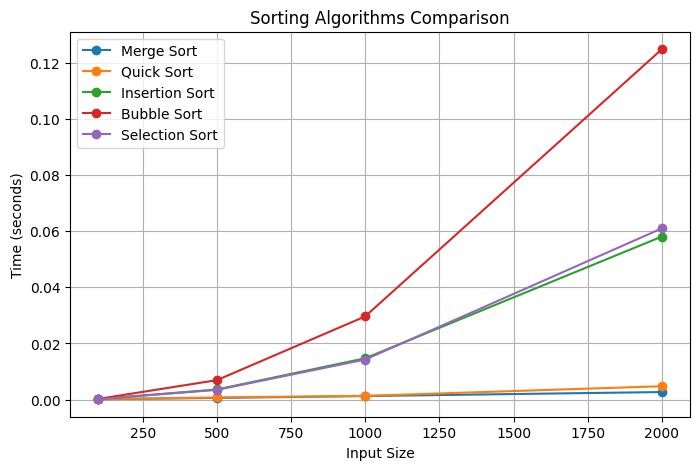

In [22]:
sizes = [100, 500, 1000, 2000]  # adjust for your CPU
algos = {
    'Merge Sort': merge_sort,
    'Quick Sort': quick_sort,
    'Insertion Sort': insertion_sort,
    'Bubble Sort': bubble_sort,
    'Selection Sort': selection_sort
}

results = {}
for name, fn in algos.items():
    times = []
    for n in sizes:
        arr = generate_random_array(n)
        t = time_function(fn, arr)
        times.append(t)
    results[name] = times
    print(f"{name}: {times}")

# Plot
plt.figure(figsize=(8,5))
for name, times in results.items():
    plt.plot(sizes, times, marker='o', label=name)
plt.xlabel('Input Size')
plt.ylabel('Time (seconds)')
plt.title('Sorting Algorithms Comparison')
plt.legend()
plt.grid(True)
plt.show()


### Observations & Analysis
- **Merge Sort:** Time grows as O(n log n), memory higher due to extra arrays.
- **Quick Sort:** Very fast on average, slightly better than Merge Sort; random pivot avoids worst case.
- **Insertion Sort:** Time explodes after n > 500; best for nearly-sorted small inputs.
- **Bubble Sort & Selection Sort:** Extremely slow for large n; only for educational use.
- **Binary Search:** Extremely fast; time almost negligible even for n = 1,000,000.
- **Fibonacci (Naive):** Exponential growth, impractical beyond n ~ 35.
- **Fibonacci (DP):** Scales linearly and very efficient for large n.


| Algorithm | Best | Avg | Worst | Space | Stable |
|-----------|------|-----|-------|-------|--------|
| Fibonacci (Naive) | — | O(2^n) | O(2^n) | O(n) | No |
| Fibonacci (DP) | O(n) | O(n) | O(n) | O(1) | No |
| Merge Sort | O(n log n) | O(n log n) | O(n log n) | O(n) | Yes |
| Quick Sort | O(n log n) | O(n log n) | O(n^2) | O(log n) | No |
| Insertion Sort | O(n) | O(n^2) | O(n^2) | O(1) | Yes |
| Bubble Sort | O(n) | O(n^2) | O(n^2) | O(1) | Yes |
| Selection Sort | O(n^2) | O(n^2) | O(n^2) | O(1) | No |
| Binary Search | O(1) | O(log n) | O(log n) | O(1) | — |
